## Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias

### Objetivo:  
Identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

### Etapas 
 
El proyecto consistirá en cinco etapas:
 1. Abrir los archivo con los datos y estudiar la información general
 2. Preparar los datos
 3. Analizar los datos
 4. Crear un perfil de usuario 
 5. Probar las hipótesis
 6. Entregar la conclusión general

# Etapa 1 Abrir los archivo con los datos y estudiar la información general

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
from scipy.stats import levene

In [ ]:
try:
    games = pd.read_csv('/content/games.csv')
    
except:
    games = pd.read_csv('/datasets/games.csv')

# Etapa 2 Prepara los datos

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas).
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
games['year_of_release'].isna().sum()

269

In [ ]:
games['year_of_release'].value_counts(dropna=False,normalize=True)

2008.0    0.085372
2009.0    0.085313
2010.0    0.075082
2007.0    0.071612
2011.0    0.067963
2006.0    0.060185
2005.0    0.056177
2002.0    0.049596
2003.0    0.046366
2004.0    0.045588
2012.0    0.039067
2015.0    0.036255
2014.0    0.034759
2013.0    0.032546
2016.0    0.030033
2001.0    0.028836
1998.0    0.022674
2000.0    0.020939
1999.0    0.020221
1997.0    0.017290
NaN       0.016093
1996.0    0.015734
1995.0    0.013102
1994.0    0.007239
1993.0    0.003709
1981.0    0.002752
1992.0    0.002573
1991.0    0.002453
1982.0    0.002154
1986.0    0.001256
1983.0    0.001017
1989.0    0.001017
1990.0    0.000957
1987.0    0.000957
1988.0    0.000897
1984.0    0.000838
1985.0    0.000838
1980.0    0.000538
Name: year_of_release, dtype: float64

In [ ]:
# para la columna year_of_release se eliminan al no superar el 2% de datos ausentes 
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Bien, de acuerdo.

In [ ]:
# Convierte los datos en los tipos necesarios.
games['year_of_release'] = games['year_of_release'].astype('int')

In [ ]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
games.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

## 2.1 Tratamiento de datos Ausentes 

# critic_score

In [ ]:
# para las columnas name y genre se eliminan al no superar el 1% de datos ausentes 
games = games.dropna(subset=['name', 'genre']).reset_index(drop=True)
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [ ]:
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [ ]:
games['critic_score'].value_counts(dropna=False,normalize=True)

NaN     0.514534
70.0    0.015325
71.0    0.015081
75.0    0.014595
80.0    0.014291
          ...   
20.0    0.000182
29.0    0.000182
21.0    0.000061
17.0    0.000061
13.0    0.000061
Name: critic_score, Length: 82, dtype: float64

In [ ]:
# % de datos ausentes de la columna critic_score
critic_score_nan = 8461
total_critic_score = 16444
resultado = (critic_score_nan / total_critic_score *100)
print(f'El porcentaje de participacion de numeros ausentes es {resultado}%')

El porcentaje de participacion de numeros ausentes es 51.453417659936754%


In [ ]:
games['critic_score'].mean()

68.99436302142053

Debido a la gran cantidad de datos ausentes se decide dejar asi, y no reemplazar por una variable.

# user_score

In [ ]:
# % de datos ausentes de la columna user_score
user_score_nan = 6605
total_user_score = 16444
resultado = (user_score_nan / total_user_score *100)
print(f'El porcentaje de participacion de numeros ausentes es {resultado}%')

El porcentaje de participacion de numeros ausentes es 40.166626125030405%


In [ ]:
games['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [ ]:
# datos aunsentes y con tbd
games['user_score'].value_counts(dropna=False,normalize=True)

NaN    0.401666
tbd    0.144490
7.8    0.019582
8      0.017332
8.2    0.016784
         ...   
1.9    0.000122
0.9    0.000122
0.3    0.000122
9.7    0.000061
0      0.000061
Name: user_score, Length: 97, dtype: float64

In [ ]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [ ]:
games['user_score'] = games['user_score'].astype('float')

In [ ]:
games['user_score'].value_counts(dropna=False,normalize=True)

NaN    0.546157
7.8    0.019582
8.0    0.017332
8.2    0.016784
8.3    0.015325
         ...   
1.0    0.000122
1.5    0.000122
9.6    0.000122
0.0    0.000061
9.7    0.000061
Name: user_score, Length: 96, dtype: float64

In [ ]:
# % de datos ausentes de la columna user_score
user_score_nan = 6605
total_user_score = 16444
resultado = (user_score_nan / total_user_score *100)
print(f'El porcentaje de participacion de numeros ausentes es {resultado}')

El porcentaje de participacion de numeros ausentes es 40.166626125030405


In [ ]:
games['user_score'].mean()

7.126329894144447

In [ ]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [ ]:
# % de datos ausentes de la columna user_score
user_score_nan = 8981
total_user_score = 16444
resultado = (user_score_nan / total_user_score *100)
print(f'El porcentaje de participacion de numeros ausentes es {resultado}')

El porcentaje de participacion de numeros ausentes es 54.61566528825104


In [ ]:
games['user_score'].value_counts(dropna=False,normalize=True)

NaN    0.546157
7.8    0.019582
8.0    0.017332
8.2    0.016784
8.3    0.015325
         ...   
1.0    0.000122
1.5    0.000122
9.6    0.000122
0.0    0.000061
9.7    0.000061
Name: user_score, Length: 96, dtype: float64

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# rating

In [ ]:
games['rating'] = games['rating'].fillna('RP')

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## 2.2 Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [ ]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP


In [ ]:
games['ventas_totales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


# Conclusion etapa 2


Para esta etapa, se cambiaron los nombres de las columnas a minusculasy ademas de los formatos a las columnas necesarias, ademas de eliminarlos datos aunsentes a las columnas de menos de 2% del total de datos, y para las otras columnas, donde los datos ausentes eran un porcentarje importante se cambio por la media, debido que no teniamos datos atipicos, y por último de agregar la columna de ventas totales por juego al DF. 

# Etapa 3. Analiza los datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [ ]:
numero_juegos_años = games.groupby(['year_of_release'])['name'].count()
numero_juegos_años.head(37)


year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

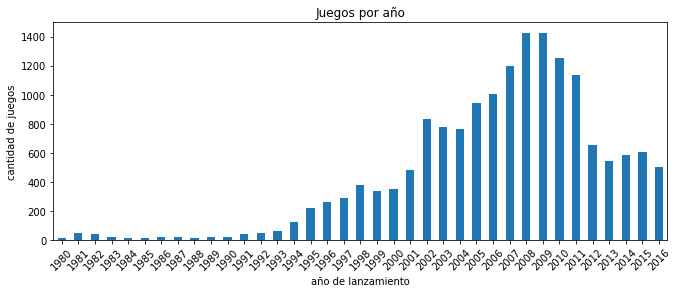

In [ ]:
numero_juegos_años.plot(kind='bar',figsize=(11,4))
plt.title('Juegos por año')
plt.xlabel('año de lanzamiento')
plt.ylabel('cantidad de juegos')
plt.xticks(rotation=45)
plt.show()

podemos ver que la cantidad de juegos por años desde los inicios de los datos ha ido incrementando la cantidad de números de juegos creados por año, esto se debe al crecimiento de la industria de los videos juegos, pero en los últimos años también se puede observar una disminución de la cantidad de juegos por año, esto se debe a las actuales generaciones de videos juegos, donde crear un nuevo juego conlleva mucho más desarrollo en cuanto e tiempo.
desde 1993, los datos comienzan a ser significativos debido que se llegan a duplicar entre un año y otro
.

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [ ]:
games_pivot = games.pivot_table(index='platform', values= 'ventas_totales', aggfunc='sum').sort_values(by='ventas_totales',ascending=False)
games_pivot.head(37)

,ventas_totales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


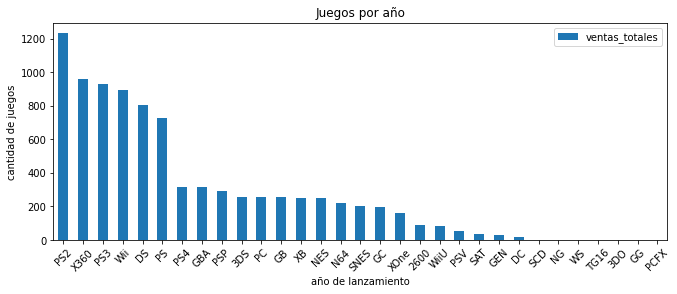

In [ ]:
games_pivot.plot(kind='bar',figsize=(11,4))
plt.title('Juegos por año')
plt.xlabel('año de lanzamiento')
plt.ylabel('cantidad de juegos')
plt.xticks(rotation=45)
plt.show()

aqui podemos ver que la cantidad de ventas por plataforma siendo ps2 la que más juegos a vendidos y pcfx la que menos a vendido

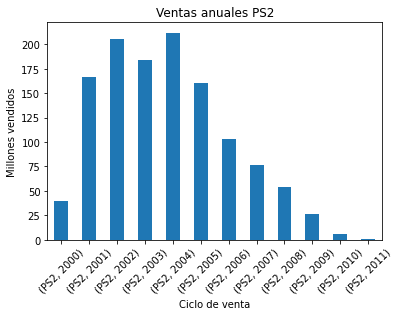

In [ ]:
ps2 = games.query('platform == "PS2"')
ps2_stat = ps2.groupby(['platform','year_of_release'])['ventas_totales'].sum()
ps2_stat.plot(kind='bar',figsize=(6,4))
plt.title('Ventas anuales PS2')
plt.xlabel('Ciclo de venta')
plt.ylabel('Millones vendidos')
plt.xticks(rotation=45)
plt.show()

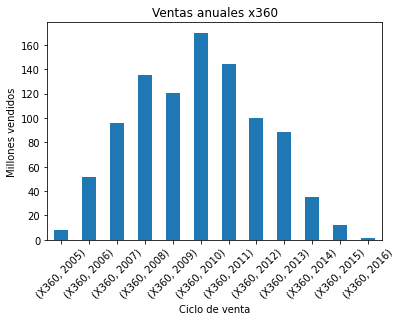

In [ ]:
x360 = games.query('platform == "X360"')
x360_stat = x360.groupby(['platform','year_of_release'])['ventas_totales'].sum()
x360_stat.plot(kind='bar',figsize=(6,4))
plt.title('Ventas anuales x360')
plt.xlabel('Ciclo de venta')
plt.ylabel('Millones vendidos')
plt.xticks(rotation=45)
plt.show()

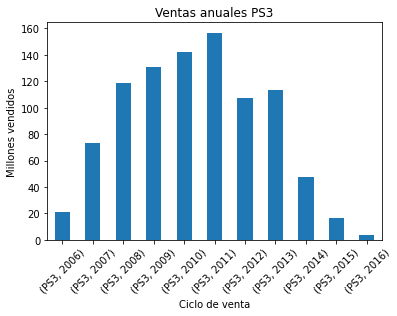

In [ ]:
ps3 = games.query('platform == "PS3"')
ps3_stat = ps3.groupby(['platform','year_of_release'])['ventas_totales'].sum()
ps3_stat.plot(kind='bar',figsize=(6,4))
plt.title('Ventas anuales PS3')
plt.xlabel('Ciclo de venta')
plt.ylabel('Millones vendidos')
plt.xticks(rotation=45)
plt.show()

las nuevas generaciones de consolas se demoran en aparecer en un periodo de 10 años, mismo periodo que se demoran en desaparecer aproximadamente, en plataformas exitosas. con un máximo histórico de ventas de 5 años por plataforma exitosa.

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

In [ ]:
modelo_2017 = games.query('year_of_release >= 2014 and year_of_release <=2016' )
modelo_2017.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,RP,7.98


la variable modelo_2017, tiene los datos para el modelo 2017, con los 3 años últimos.

¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [ ]:
modelo_pivot = modelo_2017.pivot_table(index='platform', columns='year_of_release', values= 'ventas_totales', aggfunc='sum')
modelo_pivot.head(37)

year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


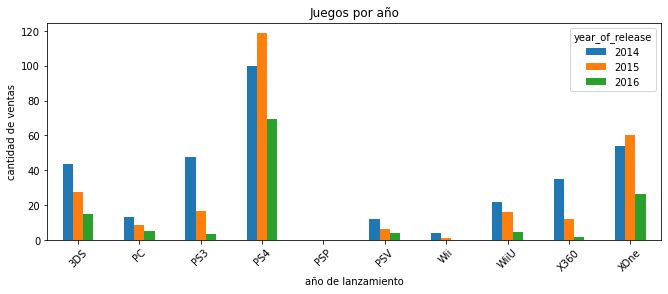

In [ ]:
modelo_pivot.plot(kind='bar',figsize=(11,4))
plt.title('Juegos por año')
plt.xlabel('año de lanzamiento')
plt.ylabel('cantidad de ventas')
plt.xticks(rotation=45)
plt.show()

Las plataformas lideres en ventas son PS4 y atras Xone seguido de 3DS, todas las plataformas se reducen en comparacion al año 2015 ademas de reducirse tambien en el año 2014 menos PS4 y Xone, que tuvieron un ingrementos de ventas ese año en comparacion del año 2014.
Las plataformas con mas potencial en reentabilidad son PS4, Xone, y 3DS


Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

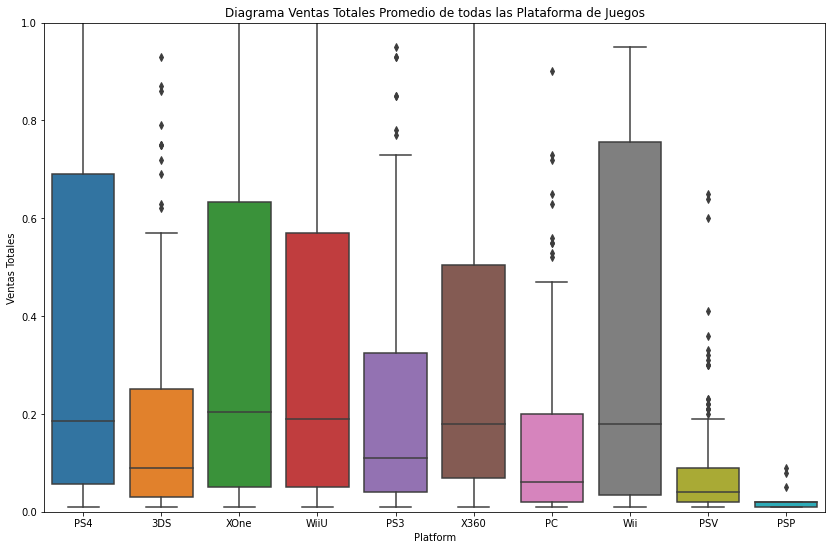

In [ ]:
plt.figure(figsize=(14,9))
sns.boxplot(x='platform', y='ventas_totales', data=modelo_2017)
plt.ylim(0, 1)
plt.title('Diagrama Ventas Totales Promedio de todas las Plataforma de Juegos')
plt.xlabel('Platform')
plt.ylabel('Ventas Totales');

Conclusiones del Daigrama, podemos ver que la mediana de las plataformas PS4, Xone, WiiU, X360, y por último Wii, son muy similares, que si hay una diferencia significativa en cuanto a las ventas y las plataformas antes mencionadas, tienen una distribucion muy similar. 

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

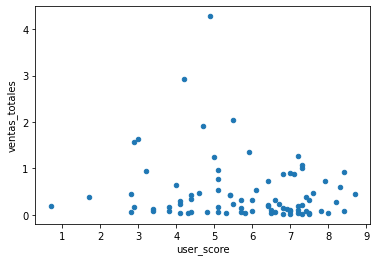

In [ ]:
modelo_2017.query('platform == "X360"').plot(x='user_score', y='ventas_totales', kind='scatter');

In [ ]:
critica_usuario = modelo_2017.query('platform == "X360"')
critica_usuario['user_score'].corr(critica_usuario['ventas_totales'])

-0.138444570945665

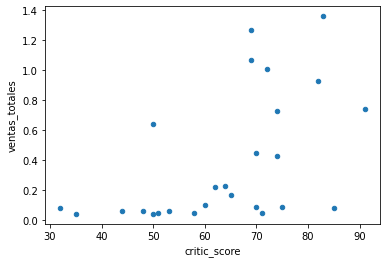

In [ ]:
modelo_2017.query('platform == "X360"').plot(x='critic_score', y='ventas_totales', kind='scatter');

In [ ]:
critica_experto = modelo_2017.query('platform == "X360"')
critica_experto['critic_score'].corr(critica_experto['ventas_totales'])

0.5257228356581523

Según muestran los gráficos y rectifican los cálculos de correlación, Se puede decir que "existe una correlación" para user_score y las ventas, porque el cálculo es muy cercano a cero (-0.13).Para la variable critic_score la correlación es mas lejana dado que es una correlación de 0.5 positiva, esta mas lejano cero esto indica que si hay una voluntad de compra en base a las calificaciones de los críticos.

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [ ]:
modelo_2017.query('genre =="Racing"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
633,Need for Speed (2015),PS4,2015,Racing,0.50,1.50,0.05,0.37,NaN,NaN,RP,2.42
803,DriveClub,PS4,2014,Racing,0.36,1.38,0.02,0.31,71.0,6.1,E,2.07
964,Forza Motorsport 6,XOne,2015,Racing,0.73,0.90,0.03,0.14,87.0,7.9,E,1.80
1024,The Crew,PS4,2014,Racing,0.35,1.08,0.03,0.26,61.0,5.4,T,1.72
...,...,...,...,...,...,...,...,...,...,...,...,...
16221,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16238,Ride 2,XOne,2016,Racing,0.00,0.01,0.00,0.00,NaN,8.2,E,0.01
16239,Ride 2,PC,2016,Racing,0.00,0.01,0.00,0.00,78.0,7.9,E,0.01
16276,MotoGP 14,PSV,2014,Racing,0.00,0.01,0.00,0.00,NaN,7.5,E,0.01


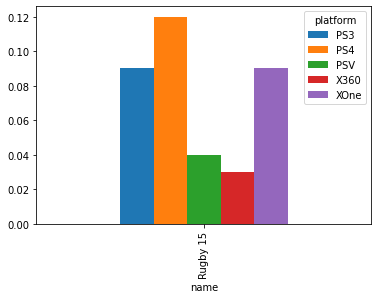

In [ ]:
(modelo_2017
     .query('name == "Rugby 15"')
     .pivot_table(index='name',columns='platform', values='ventas_totales', aggfunc='sum')
     .plot(kind='bar')
);

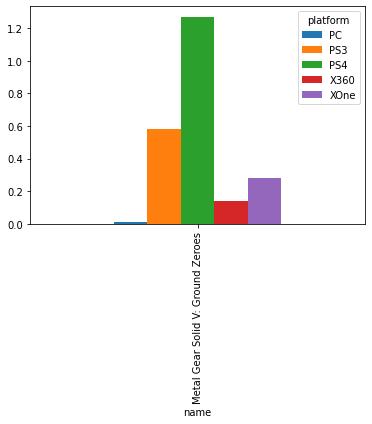

In [ ]:
(modelo_2017
     .query('name == "Metal Gear Solid V: Ground Zeroes"')
     .pivot_table(index='name',columns='platform', values='ventas_totales', aggfunc='sum')
     .plot(kind='bar')
);

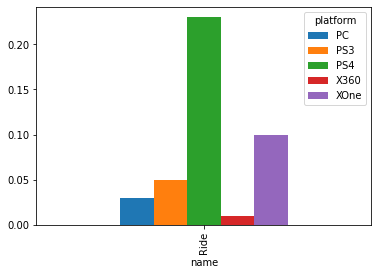

In [ ]:
(modelo_2017
     .query('name == "Ride"')
     .pivot_table(index='name',columns='platform', values='ventas_totales', aggfunc='sum')
     .plot(kind='bar')
);

Se crea una tabla por genero para ver los títulos de los juegos y poder realizar la comparación, para esta comparación se utilizó una muestra de un género de deportes, acción y carreras, donde la plataforma PS4, gana en ventas en los 3 ejercicios, seguido de Xone y PS3

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

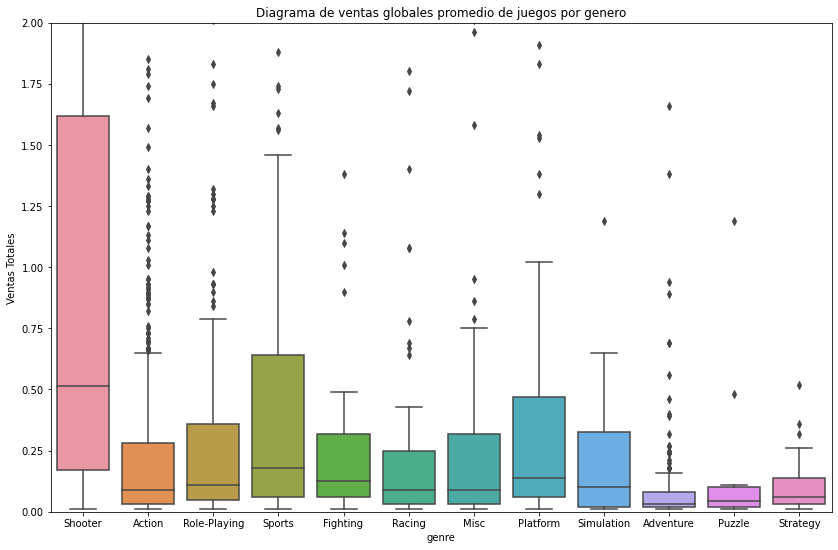

In [ ]:
plt.figure(figsize=(14,9))
sns.boxplot(x='genre', y='ventas_totales', data=modelo_2017)
plt.ylim(0, 2)
plt.title('Diagrama de ventas globales promedio de juegos por genero')
plt.xlabel('genre')
plt.ylabel('Ventas Totales');

los géneros más rentables son Shooter, Sport y Platform. También asi los menos reentable son Puzzle, Strategy y Adventure.

# Etapa 4. Crea un perfil de usuario para cada región

Crea un perfil de usuario para cada región
Para cada región (NA, UE, JP) determina:
Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.


In [ ]:
modelo_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  ventas_totales   1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 236.1+ KB


# Región NA

In [ ]:
na_region = modelo_2017.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
plataforma_5_na = na_region.head()

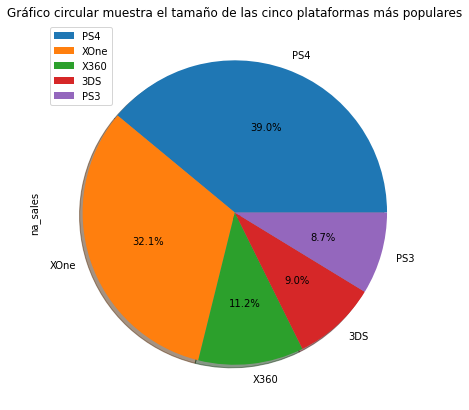

In [ ]:
(plataforma_5_na
     .pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
     .plot(y='na_sales',kind='pie',title = 'Gráfico circular muestra el tamaño de las cinco plataformas más populares', 
                      figsize=(7, 7), autopct='%1.1f%%', shadow=True)
);

# Región EU

In [ ]:
eu_region = modelo_2017.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
plataforma_5_eu = eu_region.head()

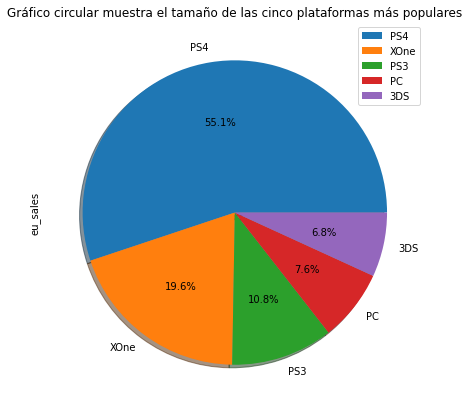

In [ ]:
(plataforma_5_eu
     .pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
     .plot(y='eu_sales',kind='pie',title = 'Gráfico circular muestra el tamaño de las cinco plataformas más populares', 
                      figsize=(7, 7), autopct='%1.1f%%', shadow=True)
);

# Región JP

In [ ]:
jp_region = modelo_2017.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
plataforma_5_jp = jp_region.head()

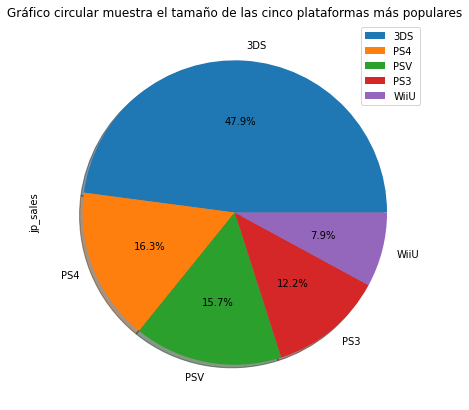

In [ ]:
(plataforma_5_jp
     .pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
     .plot(y='jp_sales',kind='pie',title = 'Gráfico circular muestra el tamaño de las cinco plataformas más populares', 
                      figsize=(7, 7), autopct='%1.1f%%', shadow=True)
);

Podemos ver que las preferencias cambian dependiendo de la región por ejemplo en la región NA, PS4 y Xone lideran las ventas, en cambio en la región EU, PS4 lidera el mercado con una mayor participación de mercado, aunque Xone, al igual que en NA, es la segunda plataforma más popular, y por último la Región JP, donde lidera la plataforma 3DS, y PS4, en segundo lugar y lo más curioso que desaparece Xone, donde en las dos regiones anteriores era la segunda plataforma más popular

## 4.1 Los cinco géneros principales. Explica la diferencia.

In [ ]:
games_genre_na = modelo_2017.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
games_5_na = games_genre_na.head()
games_5_na.reset_index(drop=True)

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


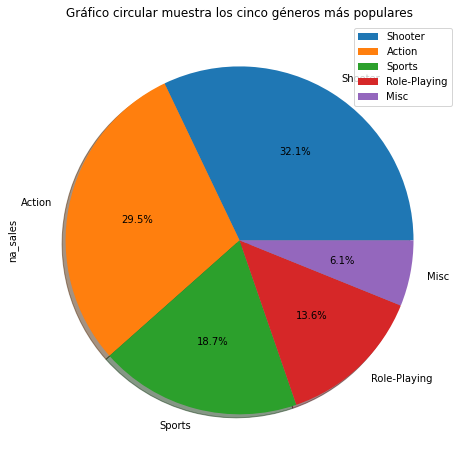

In [ ]:
(games_5_na
     .pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
     .plot(y='na_sales',kind='pie',title = 'Gráfico circular muestra los cinco géneros más populares', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

Para la región de NA el género que se lleva la mayor parte de las ventas es Shooters, seguido de acción.

In [ ]:
games_genre_eu = modelo_2017.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
games_5_genre_eu = games_genre_eu.head()
games_5_genre_eu.reset_index(drop=True)

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


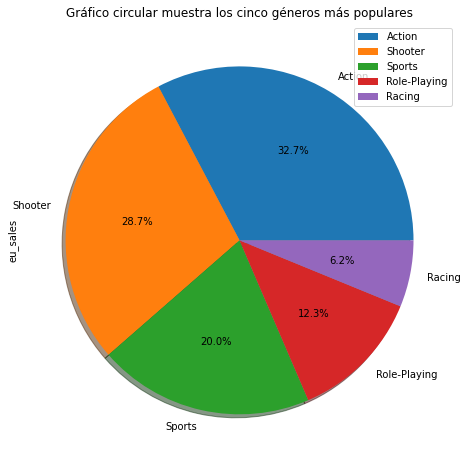

In [ ]:
(games_5_genre_eu
     .pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
     .plot(y='eu_sales',kind='pie',title = 'Gráfico circular muestra los cinco géneros más populares', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

Para la región de EU el género que se lleva la mayor parte de las ventas es acción, seguido de Shooters.

In [ ]:
games_genre_jp = modelo_2017.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
games_5_genre_jp = games_genre_jp.head()
games_5_genre_jp.reset_index(drop=True)

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


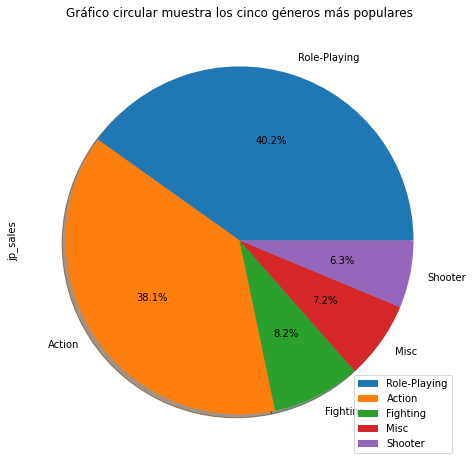

In [ ]:
(games_5_genre_jp
     .pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
     .plot(y='jp_sales',kind='pie',title = 'Gráfico circular muestra los cinco géneros más populares', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

Para la región de JP el género que se lleva la mayor parte de las ventas es juegos de rol, seguido de acción.

# 4.2 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [ ]:
games_clasificaciones = modelo_2017.groupby(['rating'])['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending = False)
games_clasificaciones = games_clasificaciones.reset_index(drop=True)
games_clasificaciones

,rating,other_sales
0,M,28.67
1,RP,18.40
2,E,15.39
3,T,11.33
4,E10+,7.83


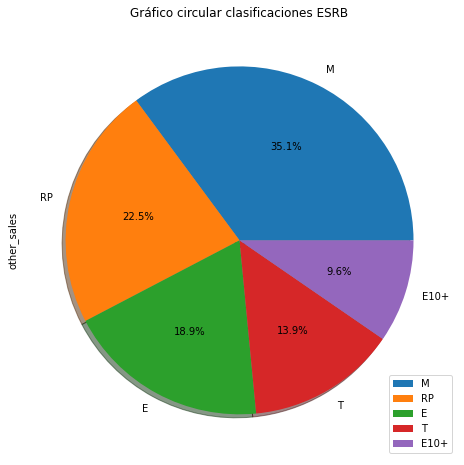

In [ ]:
(games_clasificaciones
     .pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values(by='other_sales',ascending=False)
     .plot(y='other_sales',kind='pie',title = 'Gráfico circular clasificaciones ESRB', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

In [ ]:
games_clasificaciones_na = modelo_2017.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)
games_clasificaciones_na = games_clasificaciones_na.reset_index(drop=True)
games_clasificaciones_na

,rating,na_sales
0,M,96.42
1,RP,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


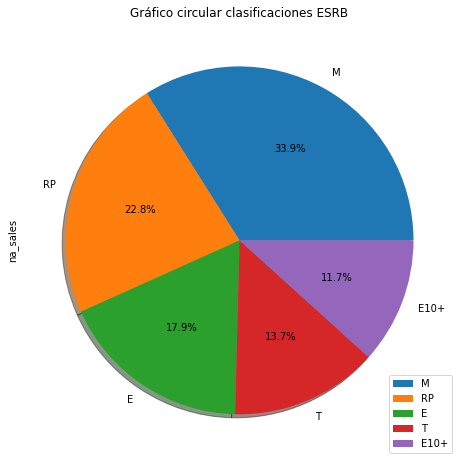

In [ ]:
(games_clasificaciones_na
     .pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False)
     .plot(y='na_sales',kind='pie',title = 'Gráfico circular clasificaciones ESRB', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

In [ ]:
games_clasificaciones_eu = modelo_2017.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
games_clasificaciones_eu = games_clasificaciones_eu.reset_index(drop=True)
games_clasificaciones_eu

,rating,eu_sales
0,M,93.44
1,RP,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


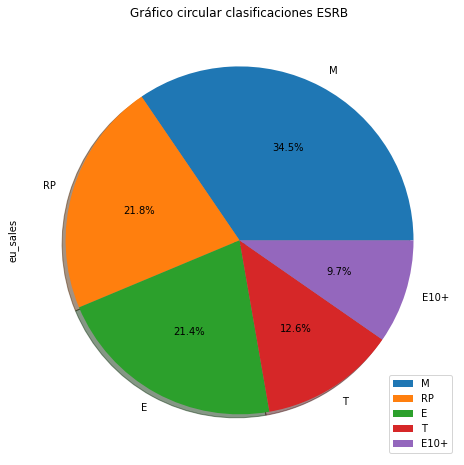

In [ ]:
(games_clasificaciones_eu
     .pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
     .plot(y='eu_sales',kind='pie',title = 'Gráfico circular clasificaciones ESRB', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

In [ ]:
games_clasificaciones_jp = modelo_2017.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
games_clasificaciones_jp = games_clasificaciones_jp.reset_index(drop=True)
games_clasificaciones_jp

,rating,jp_sales
0,RP,56.90
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


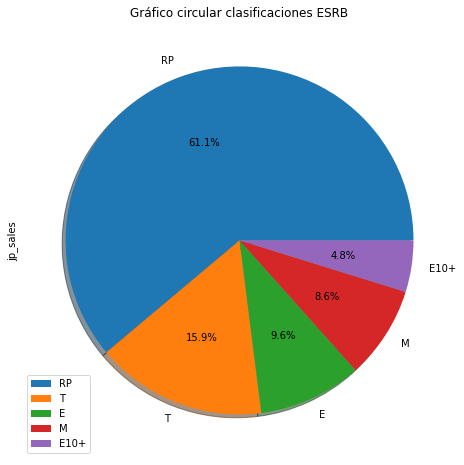

In [ ]:
(games_clasificaciones_jp
     .pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
     .plot(y='jp_sales',kind='pie',title = 'Gráfico circular clasificaciones ESRB', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

En general la preferencia a nivel mundial esta en titulos para mayoresde 18 años, pero en la región JP tiene una gran cantidad de juegos sin clasificar.

# Etapa 5. Prueba las siguientes hipótesis:

#### Hipótesis nula H₀ = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#### Hipótesis alternativa, H₁ = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.

In [ ]:
Xone = modelo_2017.query('platform == "XOne"')
PC = modelo_2017.query('platform == "PC"')

In [ ]:
varianza_Xone = np.var(Xone.user_score)
varianza_Xone 


1.879546005509642

In [ ]:
varianza_PC = np.var(PC.user_score)
varianza_PC

2.8773743617307175

In [ ]:
Xone_va = Xone.user_score
PC_va =  PC.user_score

alpha = 0.05 

results_levene =st.levene(PC_va.dropna(), Xone_va.dropna()) 
print('p-value:', results_levene.pvalue) 

if (results_levene.pvalue < alpha):
    print("Rechazamos la hipótesis nula: las varianzas pueden considerarse diferentes")
else:
    print("No rechazamos la hipótesis nula: las varianzas pueden considerarse iguales")

p-value: 0.014868430917663678
Rechazamos la hipótesis nula: las varianzas pueden considerarse diferentes


In [ ]:
Xone_va = Xone.user_score
PC_va =  PC.user_score

alpha = 0.05 

results =st.ttest_ind(PC_va, Xone_va, equal_var = False, nan_policy='omit') 
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.11601398086668943
No rechazamos la hipótesis nula


Formulamos la hipótesis nula al afirmar que no hay diferencia entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC. Utilizamos un nivel de significación de 0,05. Dado que el valor p es mayor que = 0,05, no podemos rechazar la hipótesis nula. La evidencia sugiere que no existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC, es decir, las calificaciones promedio de los usuarios de Xbox One y las calificaciones promedio de los usuarios de las plataformas PC son las mismas.

#### Hipótesis nula H₀ = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
#### Hipótesis alternativa, H₁ = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son iguales.

In [ ]:
accion = modelo_2017.query('genre == "Action"')
sports = modelo_2017.query('genre == "Sports"')

In [ ]:
varianza_accion = np.var(accion.user_score)
varianza_accion


1.89208448117539

In [ ]:
varianza_sport   = np.var(sports.user_score)
varianza_sport

3.419837559675119

In [ ]:
accion_mean = accion['user_score']
sports_mean =  sports['user_score']


alpha = 0.05 

results =st.ttest_ind(accion_mean, sports_mean, equal_var = False ,nan_policy='omit') 
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.182555038264477e-14
Rechazamos la hipótesis nula


Formulamos la hipótesis nula al afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. Utilizamos un nivel de significación de 0,05. Dado que el valor p es menor que = 0.05, rechazamos la hipótesis nula. Nuestro análisis sugiereque existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

# Conclusión final
Tras realizar el analisis general de los datos, lo primero quenhicimosfue ver los valores nulos y errores de formato en varias columnas.

Luego realice las correpciones correspondientes a los datos, tomando la decicion de no eliminar los datos en las columnas cuantitativas dadoque existe un gran porcentaje de datos NAN. Estas columnas lo bueno que no mostraban valores atípicos, despues reformulamos distintas afirmaciones para las columnas categoricas, como eliminar los datos NAN al ser una muy pequeña cantidad y no tenian mayor relevancia.

Ya en la Etapa 3 análisis de datos se puede destacar la cracion de un nuevo DF, que es el que se usara de aqui en adelante, y se responderandiversas preguntas que nos ayudaran a enteder mejor la industria de los videos juegos, y a grandes rasgos podemos decir que resumidamente que las consolas de la familia playstation y la familia nintendo y X360 conjunto a Xone. son las plataformas con mas ventas y relevancia dentro del análisis, que a su vez los géneros de shooter y acción son los mas vendidos y que no existen grandes diferencias de gustos entre regiones.

Por último, realizamos una prueba de hipótesis para determinar si las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas. Nuestra prueba confirma que las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas. También probamos para ver si la calificación promedio de los usuarios para el género Acción y Deportes son iguales. Nuestro resultado del análisis sugiere que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes
